<a href="https://colab.research.google.com/github/Ayush-Kori/Quant-Dev-/blob/main/Cointegrating_mean_reverting_pair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from statsmodels.tsa.stattools import coint
from statsmodels.api import OLS
df1=pd.read_excel('GLD.xls')
df2=pd.read_excel('GDX.xls')
df=pd.merge(df1, df2, on='Date', suffixes=('_GLD', '_GDX'))
print(df)

          Date  Open_GLD  High_GLD  Low_GLD  Close_GLD  Volume_GLD  \
0   2007-11-30     78.35     78.60    76.98      77.32     9509100   
1   2007-11-29     79.28     79.33    78.28      78.28     9306700   
2   2007-11-28     79.42     79.87    78.76      79.57     9706700   
3   2007-11-27     80.70     80.89    79.81      80.10     7229900   
4   2007-11-26     82.25     82.25    81.13      81.30     7440200   
..         ...       ...       ...      ...        ...         ...   
380 2006-05-30     65.20     66.24    65.00      65.11     8240200   
381 2006-05-26     65.01     65.10    63.75      65.10     5265900   
382 2006-05-25     64.12     64.76    63.76      64.70     6505400   
383 2006-05-24     64.83     65.16    63.22      64.06    11065600   
384 2006-05-23     65.99     67.16    65.91      66.38    10509700   

     Adj Close_GLD  Open_GDX  High_GDX  Low_GDX  Close_GDX  Volume_GDX  \
0            77.32     47.09     47.50    45.70      46.36     2006000   
1          

In [7]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
trainset=np.arange(0, 252)
df=df.iloc[trainset,]

Run cointegration (Eagel =Granger)

In [8]:
coint_t, pvalue, crit_value=coint(df['Adj Close_GLD'], df['Adj Close_GDX'])
(coint_t, pvalue, crit_value)  # abs (t-stat) > critical value at 95%. pvalue says
# probability of null hypo-thesis  (of no cointegration) is only 1.8%


(np.float64(-2.35912683766872),
 np.float64(0.3444494880427906),
 array([-3.94060523, -3.36058133, -3.06139039]))

In [9]:
# Determine hedge ratio
model=OLS(df['Adj Close_GLD'], df['Adj Close_GDX'])
results=model.fit()

In [10]:
hedgeRatio=results.params
hedgeRatio

,0
Adj Close_GDX,1.631009


Spread =  GLD- hedgeRatio*GDX

/tmp/ipython-input-852059632.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread=df['Adj Close_GLD']-hedgeRatio[0]*df['Adj Close_GDX']


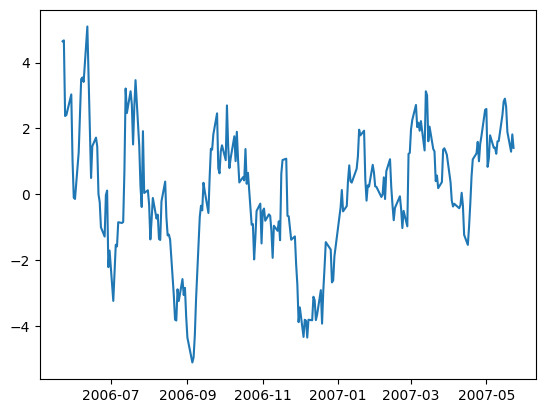

In [11]:
spread=df['Adj Close_GLD']-hedgeRatio[0]*df['Adj Close_GDX']
plt.plot(spread)

Note: Here we can see Pythons code Engle-Ganger test generatieds a r-dtatistics of -2.4, whose absolutevalue is less than 90% which contradicts the result of the matlab so wecant trust python models blindly